In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [6]:
data=pd.read_csv("Desktop/Supermart Grocery Sales - Retail Analytics Dataset.csv")

In [8]:
print(data.isnull().sum())


Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


In [10]:
data.drop_duplicates(inplace=True)


In [12]:
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')

In [127]:
invalid_dates = data[data['Order Date'].isna()]
print("Remaining rows with NaT in 'Order Date':")
print(invalid_dates)

Remaining rows with NaT in 'Order Date':
     Order ID Customer Name           Category       Sub Category  \
12       OD13        Sharon             Snacks            Cookies   
14       OD15        Sundar  Eggs, Meat & Fish            Chicken   
15       OD16        Ramesh       Oil & Masala  Edible Oil & Ghee   
17       OD18        Arutra          Beverages      Health Drinks   
18       OD19       Haseena  Eggs, Meat & Fish             Mutton   
...       ...           ...                ...                ...   
9985   OD9986         Shree  Eggs, Meat & Fish             Mutton   
9987   OD9988        Ganesh   Fruits & Veggies   Fresh Vegetables   
9989   OD9990        Sudeep  Eggs, Meat & Fish               Eggs   
9992   OD9993          Peer       Oil & Masala             Spices   
9993   OD9994        Ganesh        Food Grains       Atta & Flour   

             City Order Date   Region  Sales  Discount  Profit       State  
12       Dindigul        NaT    South   1659      0.1

In [14]:
earliest_date = data['Order Date'].min()
data['Order Date'].fillna(earliest_date, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24496\203017440.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Order Date'].fillna(earliest_date, inplace=True)


In [16]:
print(data[['Order Date']])


     Order Date
0    2017-11-08
1    2017-11-08
2    2017-06-12
3    2016-10-11
4    2016-10-11
...         ...
9989 2015-01-03
9990 2015-07-12
9991 2017-06-06
9992 2015-01-03
9993 2015-01-03

[9994 rows x 1 columns]


In [18]:
data['Day'] = data['Order Date'].dt.day
data['Month'] = data['Order Date'].dt.month
data['Year'] = data['Order Date'].dt.year

In [20]:
print(data[['Order Date', 'Day', 'Month', 'Year']])

     Order Date  Day  Month  Year
0    2017-11-08    8     11  2017
1    2017-11-08    8     11  2017
2    2017-06-12   12      6  2017
3    2016-10-11   11     10  2016
4    2016-10-11   11     10  2016
...         ...  ...    ...   ...
9989 2015-01-03    3      1  2015
9990 2015-07-12   12      7  2015
9991 2017-06-06    6      6  2017
9992 2015-01-03    3      1  2015
9993 2015-01-03    3      1  2015

[9994 rows x 4 columns]


In [22]:
le = LabelEncoder()
data['Category'] = le.fit_transform(data['Category'])
data['Sub Category'] = le.fit_transform(data['Sub Category'])
data['City'] = le.fit_transform(data['City'])
data['Region'] = le.fit_transform(data['Region'])
data['State'] = le.fit_transform(data['State'])


In [91]:
print(data.head(5))

  Order ID Customer Name  Category  Sub Category  City Order Date  Region  \
0      OD1        Harish         5            14    21 2017-11-08       2   
1      OD2         Sudha         1            13     8 2017-11-08       3   
2      OD3       Hussain         3             0    13 2017-06-12       4   
3      OD4       Jackson         4            12     4 2016-10-11       3   
4      OD5       Ridhesh         3            18    12 2016-10-11       3   

   Sales  Discount  Profit  ...  Month_3  Month_4  Month_5  Month_6  Month_7  \
0   1254      0.12  401.28  ...    False    False    False    False    False   
1    749      0.18  149.80  ...    False    False    False    False    False   
2   2360      0.21  165.20  ...    False    False    False     True    False   
3    896      0.25   89.60  ...    False    False    False    False    False   
4   2355      0.26  918.45  ...    False    False    False    False    False   

   Month_8  Month_9  Month_10  Month_11  Month_12  
0   

In [26]:
data

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Day,Month,Year
0,OD1,Harish,5,14,21,2017-11-08,2,1254,0.12,401.28,0,8,11,2017
1,OD2,Sudha,1,13,8,2017-11-08,3,749,0.18,149.80,0,8,11,2017
2,OD3,Hussain,3,0,13,2017-06-12,4,2360,0.21,165.20,0,12,6,2017
3,OD4,Jackson,4,12,4,2016-10-11,3,896,0.25,89.60,0,11,10,2016
4,OD5,Ridhesh,3,18,12,2016-10-11,3,2355,0.26,918.45,0,11,10,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,2,9,9,2015-01-03,4,945,0.16,359.10,0,3,1,2015
9990,OD9991,Alan,0,1,6,2015-07-12,4,1195,0.26,71.70,0,12,7,2015
9991,OD9992,Ravi,3,20,0,2017-06-06,4,1567,0.16,501.44,0,6,6,2017
9992,OD9993,Peer,5,22,14,2015-01-03,4,1659,0.15,597.24,0,3,1,2015


In [28]:
data.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
Day              0
Month            0
Year             0
dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24496\1934269867.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Sales', data=data, palette='Set2')


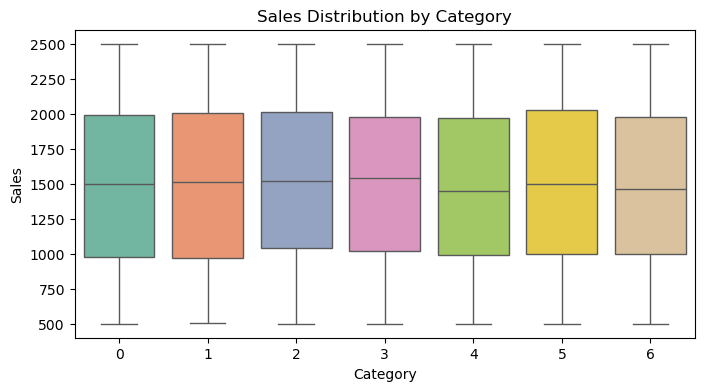

In [30]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Category', y='Sales', data=data, palette='Set2')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

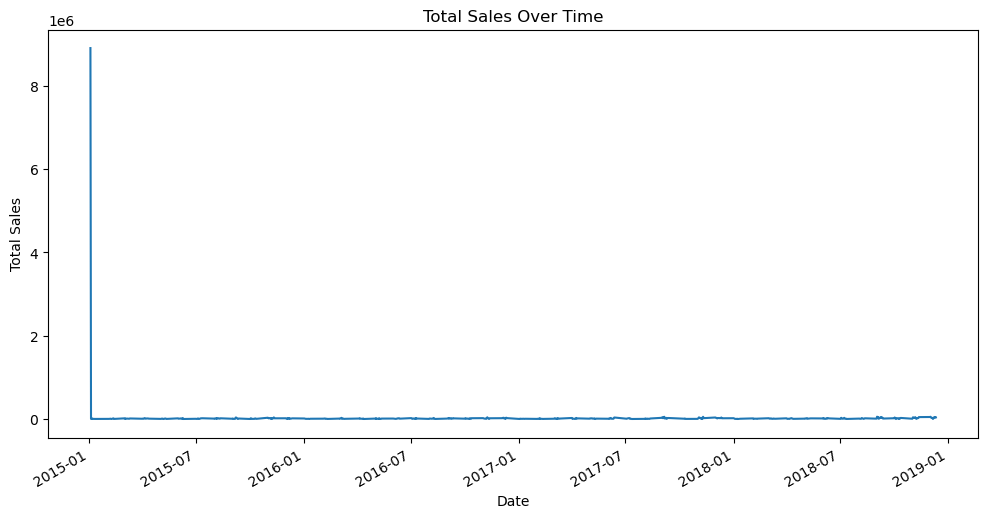

In [32]:
plt.figure(figsize=(12, 6))
data.groupby('Order Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

In [93]:
features = data.drop(columns=['Order ID', 'Customer Name',
'Order Date', 'Sales', ])
target = data['Sales']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(features,
target, test_size=0.2, random_state=42)

In [97]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [99]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [101]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 212959.04918262517
R-squared: 0.3543107141770102
